# Práctica 2 Ciencia de Redes
## Erik Juárez Guerrero

# Módulos necesarios

In [24]:
import random
import matplotlib.pyplot as plt

# Reutilización de código

In [29]:
def numero_nodos(red):
    """
    Recibe un red y regresa el número de nodos de ella.

    Parámetros
    ----------
    red : Diccionario
        Las claves representan los nodos y los valores son conjunto de los
        nodos conectados.

    Excepción
    ---------
    TypeError
        Se lanza cuando no recibe un diccionario como parámetro

    Retorno
    -------
    nodos : Entero
        El número de nodos de la red.

    """

    # valida el parámetro que recice la función
    if not isinstance(red, dict):
        raise TypeError("el parámetro que recibe numero_nodos() tiene que " +
                        " ser un diccionario")

    # mide la cantidad de nodos de la red
    nodos = len(red)
    return nodos


def crea_grafo_completo(nodos):
    """
    Recibe un número entero para regresar un grafo del tipo K_n.
    (todos los nodos están relacionados entre ellos.)

    Parámetros
    ----------
    nodos : Entero
        Es el número de nodos del grafo. tiene que ser mayor a cero.

    Excepción
    ---------
    TypeError
        Se lanza caundo no se pasa un entero como parámetro.
    ValueError
        Se lanza cuando el entero no es mayor a cero.

    Retorno
    -------
    k_n : Diccionario
        Grafo K_n es un diccionario cuyos valores son conjuntos que
        representan los enlaces a otros nodos, cada elemento del conjunto es
        un nodo relacionado.

    """

    # validación del parámetro de entrada
    if not isinstance(nodos, int):
        raise TypeError("el parámetro que recibe " +
                        "crea_grafo_completo() tiene que ser un entero " +
                        "positivo.")
    if nodos < 1:
        raise ValueError("el parámetro que recibe " +
                         "crea_grafo_completo() tiene que ser mayor a " +
                         "cero.")

    # el grafo vacío
    k_n = dict()

    # contrucción del grafo
    for nodo in range(nodos):

        # se contruye el conjunto de nodos adyasentes
        ady = set(range(nodos))
        ady.discard(nodo)

        k_n[nodo] = ady

    return k_n


def calcula_grados_de_entrada(d_grafica):
    """
    Recibe un diccionario que representa una gráfica dirigida y regresa un
    diccionario donde sus llaves son los nodos de la gráfica y los valores son
    el grado de entrada de ese nodo.

    Parámetros
    ----------
    d_grafica : Diccionario
        Gráfica dirigida, las claves representan los nodos y los valores son
        conjunto de los nodos a los que se conectan.

    Excepción
    ---------
    TypeError
        Se lanza cuando no recibe un diccionario como parámetro.

    Retorno
    -------
    deg_in : Diccionario
        Las llaves de este diccionario son nodos y sus valores son enteros que
        indican el grado de entrada de los nodos.

    """

    # validación del parámetro de entrada
    if not isinstance(d_grafica, dict):
        raise TypeError("el parámetro que recibe " +
                        "calcula_grados_de_entrada() tiene que ser un " +
                        "diccionario.")

    # valor de retorno es diccionario vacío
    deg_in = dict()

    # contrución de la tabla
    for nodo in d_grafica.keys():
        k_deg = 0

        # verifica que nodos se enlazan al nodo que recorre actualmente
        for ady in d_grafica.values():  # v-->nodos a los que entra
            k_deg += list(ady).count(nodo)

        deg_in[nodo] = k_deg

    return deg_in


def tamagno(red):
    """
    Recibe un diccionario que representa una gráfica y regresa el número de
    aristas que tiene.

    Parámetros
    ----------
    red : Diccionario
        Las llaves del diccionario son representan los nodos de la red y sus
        valores son conjuntos que representan conecciones.

    Excepción
    ---------
    TypeError
        Se lanza cuando no se recibe un diccionario como parámetro.

    Retorno
    -------
    aristas : Entero
        Es el número de arista de la red que entro como parámetro.

    """

    # validación de parámetros de entrada
    if not isinstance(red, dict):
        raise TypeError("el parámetro que recibe tamagno() tiene que ser " +
                        "un diccionario.")

    # se calcula los grados de entrada de los nodos de la red
    deg_in = calcula_grados_de_entrada(red)

    # se ocupa el agloritmo para saber las arista o enlaces de la red
    aristas = int(sum(list(deg_in.values())) / 2)
    return aristas


def tamagno_grafo_completo(nodos):
    """
    Recibe un número entero que es el número de nodos de un grafo del tipo K_n.

    Parámetros
    ----------
    n : Entero
        El número de nodos en una gráfica completa.

    Excepciones
    -----------
    TypeError
        Se lanza cuando la función no recibe un entero
    ValueError
        Se lanza cuando el entero que recibe es menor a 1

    Retorno
    -------
    aristas : Entero
        Es el número de arista de la de la gráfica completa.

    """

    # validación del parámetro de entrada
    if not isinstance(nodos, int):
        raise TypeError("el parámetro que recibe " +
                        "tamagno_grafo_completo() tiene que ser un entero " +
                        "positivo.")
    if nodos < 1:
        raise ValueError("el parámetro que recibe " +
                         "tamagno_grafo_completo() tiene que ser mayor a " +
                         "cero.")

    # se ocupa el algoritmo
    aristas = int(nodos * (nodos - 1) / 2)

    return aristas


def densidad(red):
    """
    Recibe una red y regresa la densidad de ésta.

    Parámetros
    ----------
    red : Diccionario
        Las llaves del diccionario son representan los nodos de la red y sus
        valores son conjuntos que representan conecciones.

    Excepciones
    -----------
    TypeError
        Se lanza cuando no recibe un diccionario como parámetro.

    Retorno
    -------
    d : Flotante
        la densidad de la red.

    """

    # validación de parámetros de entrada
    if not isinstance(red, dict):
        raise TypeError("el parámetro que recibe densidad() tiene que ser " +
                        "un diccionario.")

    # con el número de nodos se puden obtener información de las aristas del
    # gráfo y de su grágo completo
    nodos = numero_nodos(red)

    m_g = tamagno(red)
    m_kn = tamagno_grafo_completo(nodos)

    try:
        dens = m_g / m_kn  # se calcula la densidad
    except:
        dens = 0.0

    return dens


def dist_grados_de_entrada(d_grafica):
    """
    Recibe un diccionario que representa una gráfica dirigida y regresa un
    diccionario donde sus llaves son los grados de salida de la gráfica y los
    valores son la frecuencia de los grados de entrada.

    Parámetros
    ----------
    d_grafica : Diccionario
        Gráfica dirigida, las claves representan los nodos y los valores son
        conjunto de los nodos a los que se conectan.

    Excepción
    ---------
    TypeError
        Se lanza cuando no recibe un diccionario como parámetro.

    Retorno
    -------
    distr : Diccionario
            Las llaves de este diccionario son grados de salida y sus valores
            son entero que indican la frecuencia de los grados de entrada.

    """

    # validación del parámetro de entrada
    if not isinstance(d_grafica, dict):
        raise TypeError("el parámetro que recibe " +
                        "dist_grados_de_entrada() tiene que ser un " +
                        "diccionario.")

    # obtiene la lista de los grados de entrada
    deg_in = list(calcula_grados_de_entrada(d_grafica).values())

    # umbral de grados a buscar en la lista
    deg_max = max(deg_in)

    # el valor de retorno es un diccionario vacío donde se guardaran los datos
    distr = dict()

    # recorre la lista para crear una tabla de distribución
    for grado in range(deg_max + 1):

        # cuenta cuantos veces se encuentra el grado actual en la lista
        deg_count = deg_in.count(grado)

        distr[grado] = deg_count

    return distr


def dist_normalizada_entrada(d_grafica):
    """
    Recibe un diccionario que representa una gráfica dirigida y regresa un
    diccionario donde sus llaves son los grados de entrada de la gráfica y los
    valores son la frecuencia normalizada de los grados de entrada.

    Parámetros
    ----------
    d_grafica : Diccionario
        Gráfica dirigida, las claves representan los nodos y los valores son
        conjunto de los nodos a los que se conectan.

    Excepción
    ---------
    TypeError
        Se lanza cuando no recibe un diccionario como parámetro.

    Retorno
    -------
    distr_norm : Diccionario
        Las llaves de este diccionario son grados de entrada y sus valores son
        flotantes que indican la frecuencia normalizada de los grados de
        entrada.

    """

    # validación del parámetro de entrada
    if not isinstance(d_grafica, dict):
        raise TypeError("el parámetro que recibe " +
                        "dist_normalizada_entrada() tiene que ser un " +
                        "diccionario.")

    # distribución de los grados de entrada
    dist_in = dist_grados_de_entrada(d_grafica)
    total = sum(list(dist_in.values()))

    # el valor de retorno es un diccionario vacío donde se gurdaran los datos
    distr_norm = dict()

    # se recorre el diccionario de distribución para crear un diccionario con
    # la distrubución normalizada
    for grado, frecuencia in dist_in.items():
        deg_in_norm = frecuencia/total
        distr_norm[grado] = deg_in_norm

    return distr_norm


def grafica_distr_entrada(distr):
    """
    Recibe un diccionario que contenga la distrubución de los grados de
    entrada de un grafo. Renderiza una figura con la gráfica de la
    distribución.

    Parámetros
    ----------
    distr : Dicccionario
        El diccionario contiene como valores la distrubución de los grados de
        entrada nodales(enteros) de un gráfica dirigida.

    Excepción
    ---------
    TypeError
        Se lanaza cuando no recibe un diccionario como parámetro.

    Retorno
    -------
    None.
        Se muestra la figura, pero el valor de retorno es None.
    """

    # validación del parámetro de entrada
    if not isinstance(distr, dict):
        raise TypeError("el parámetro que recibe grafica_distr_entrada() " +
                        "tiene que ser un diccionario.")

    valores_x = list(distr.keys())
    valores_y = list(distr.values())

    plt.plot(valores_x, valores_y, marker='o')
    plt.xlabel("Grado nodal")
    plt.ylabel("Número de nodos")
    plt.title("Distribución de grados de entrada")
    plt.show()


def grafica_distr_norm_entrada(distr_norm):
    """
    Recibe un diccionario que contenga la distrubución normalizada de los
    grados de entrada de un grafo Renderiza una figura con la gráfica de la
    distribución normalizada.

    Parámetros
    ----------
    distr : Dicccionario
        El diccionario contiene como valores la distrubución normalizada de
        los grados de entrada nodales(flotantes) de un gráfica dirigida.

    Excepción
    ---------
    TypeError
        Se lanza cuando no recibe un diccionario como parámetro.

    Retorno
    -------
    None.
        Se muestra la figura, pero el valor de retorno es None.
    """

    # validación del parámetro de entrada
    if not isinstance(distr_norm, dict):
        raise TypeError("el parámetro que recibe " +
                        "grafica_distr_norm_entrada() tiene que ser un " +
                        "diccionario.")

    valores_x = list(distr_norm.keys())
    valores_y = list(distr_norm.values())

    plt.plot(valores_x, valores_y, marker='o')
    plt.xlabel("Grado nodal")
    plt.ylabel("Número de nodos")
    plt.title("Distribución Normalizada de grados de entrada")
    plt.show()

# Actividad 1
Hacer una funcioón que implemente el algoritmo de Albert-Barábasi para la creación de redes de escala libre.

In [5]:
def crea_red_escala_libre(nodos_iniciales, iteraciones, enlaces_nuevos):
    """
    Esta función regresa una diccionario que representa una red de escala 
    libre, modelo de Albert-Barábasi.
    

    Parámetros
    ----------
    nodos_iniciales : Entero
        La cantidad de nodos con los que inicia la red. esta red es una 
        gráfica completa. Tiene que ser igual o mayor a 1.
    iteraciones : Entero
        la cantidad de nuevos nodos que se añadirán a la red, en cada iteración
        se agrega un nuevo nodo. Tiene que ser positivo.
    enlaces_nuevos : Entero
        La cantidad de nuevos enlaces que forma el nuevo nodo en cada 
        iteración. Tiene que ser positivo.

    Excepciones
    -----------
    TypeError
        Se lanza cuando cualquiera de los parámetros no es un entero.
    ValueError
        Se lanza cuando cualquiera del parámetros es menor a 1 o cuando el
        parámetro 'enlaces_nuevos' es mayor a el parámetro 'nodos_iniciales'.

    Retorno
    -------
    escala_libre : Diccionario
        Las llaves representasn los nodos de la red y los valores son un 
        conjunto de los nodos conectados.

    """
    
    # validación de los parámetros de entrada
    
    # validación de nodos_iniciales
    if not isinstance(nodos_iniciales, int):
        raise TypeError("el parámtro 'nodos_iniciales' que recibe" +
                        " crea_red_escala_libre tiene que ser un entero")
    if nodos_iniciales < 1:
        raise ValueError("el parámetro 'nodos_iniciales' que recibe" +
                         " crea_red_escala_libre no puede ser menor a 1.")
        
    # validación de iteraciones
    if not isinstance(iteraciones, int):
        raise TypeError("el parámtro 'iteraciones' que recibe" +
                        " crea_red_escala_libre tiene que ser un entero")
    if iteraciones < 1:
        raise ValueError("el parámetro 'iteraciones' que recibe" +
                         " crea_red_escala_libre no puede ser menor a 1.")
        
    # validación de enlaces_nuevos
    if not isinstance(enlaces_nuevos, int):
        raise TypeError("el parámtro 'enlaces_nuevos' que recibe" +
                        " crea_red_escala_libre tiene que ser un entero")
    if enlaces_nuevos < 1:
        raise ValueError("el parámetro 'enlaces_nuevos' que recibe" +
                         " crea_red_escala_libre no puede ser menor a 1.")
    if enlaces_nuevos > nodos_iniciales:
        raise ValueError("el parámetro 'enlaces_nuevos' que recibe" +
                         " crea_red_escala_libre no puede mayor al " +
                         "parámetro 'nodos_iniciales'.")
   
    # una red completa
    escala_libre = crea_grafo_completo(nodos_iniciales)
    
    # esta es la llave del nuevo nodo
    nuevo_nodo = nodos_iniciales    
    
    # iteraciones del algoritmo de Albert-Barábasi
    for i in range(iteraciones):
        
        # calculamos de la red : su tamaño, los grados de sus nodos y las 
        # probabilidades de hacer nuevas conecciones
        tam = tamagno(escala_libre)
        grados = calcula_grados_de_entrada(escala_libre) # dicc. con los grados
        
        # calculamos la probabilidades de cada nodo
        prob_nodos = dict()
        for nodo, grado in grados.items():
            try:
                prob_nodos[nodo] = grado / (2 * tam)
            except:
                prob_nodos[nodo] = 1.0
            
        # agregamos el nuevo nodo, aun no tiene conecciones
        escala_libre[nuevo_nodo] = set()
                 
        # # hacemos una a una las conecciones
        enlaces_faltantes = enlaces_nuevos
        while enlaces_faltantes:
            
            nodos = list(prob_nodos.keys())
            probabilides = list(prob_nodos.values())
            
            # se elige un nodo al azar, este regresa como una lista de un 
            # elemento
            nodo_destino = random.choices(nodos, weights=probabilides, k=1)
            
            # desempaquetamos el elemtno de la lista y hacemos las conecciones
            nodo_destino = nodo_destino[0]
            escala_libre[nuevo_nodo].add(nodo_destino)
            escala_libre[nodo_destino].add(nuevo_nodo)
            
            # sacamos el nodo que se conecto para que no se repita
            prob_nodos.pop(nodo_destino)
            
            enlaces_faltantes -= 1
        
        # debug: para ver como cambia la red
        # print(i, ":\n", escala_libre)
        
        # aumentamo nuevo nodo para la prixima iteración
        nuevo_nodo += 1
    
    return escala_libre


def grafica_aleatoria(nodos, probabilidad):
    """
    Genera una gráfica aleatoria.

    Parámetros
    ----------
    nodos : Entero
        El número de nodos de la gráfica. Tiene que ser un entero positivo
        mayor a cero.
    probabilidad : Flotante
        la probabilidad de que los nodos se conecten. Tinene que ser tener que
        ser mayor o igual a cero y ser menor o igual a 1.

    Excepciones
    -----------
    TypeError
        Se lanza cuando 'n' no es un entero, o 'p' no es un flotante.
    ValueError
        Se lanza cuando 'n' no es mayor a cero, o cuando 'p' no cumple la
        condición 0 <= p <= 1.

    Retorno
    -------
    graf_aleat : Diccionario
        El diccionario representa una gráfica, sus llaves representan los nodos
        y los valores sus valores son conjuntos que representan conecciones.

    """

    # validación de los parámetros de entrada

    # validación de n
    if not isinstance(nodos, int):
        raise TypeError("el parámetro 'n' recibe grafica_aleatoria() tiene " +
                        "que ser un entero positivo.")
    if nodos < 1:
        raise ValueError("el parámetro 'n' recibe grafica_aleatoria() " +
                         "tiene que ser mayor a cero.")

    # validación de p
    if not isinstance(probabilidad,  float):
        raise TypeError("el parámetro 'p' recibe grafica_aleatoria() tiene " +
                        "que ser un flotante positivo.")
    if not 0 <= probabilidad <= 1:
        raise ValueError("el parámetro 'p' recibe grafica_aleatoria() " +
                         "tiene que valer entre 0.0 y 1.0.")

    # la gráfica vacía, cada nodo tiene una lista de adyacencia vacia
    graf_aleat = dict()
    for nodo in range(nodos):
        graf_aleat[nodo] = set()

    # cola con los nodos. es una lista común pero se usara como cola
    nodos_destino = list(range(1, nodos))

    # El bucle hace les conecciones de la gráfica aleatoriamente, n-1 es por
    # que las conecciones se habrán hecho todas al tomar el penultimo nodo
    for nodo_origen in range(nodos-1):

        for nodo_destino in nodos_destino:

            aleatorio = random.random()
            if aleatorio < probabilidad:
                graf_aleat[nodo_origen].add(nodo_destino)
                graf_aleat[nodo_destino].add(nodo_origen)

        # sacamos el primer elemtno de la cola, ya se han hecho sus conecciones
        nodos_destino.pop(0)

    return graf_aleat

# Actividad 2

* Crear 5 gráficas aleatorias con n=15, p=0.3
* Crear 5 gráficas de escala libre con n0=2, m0=2, k=13

### Gráficas eleatorias

In [39]:
g_r = list()

for i in range(5):
    g = grafica_aleatoria(15, 0.3)
    print("Gráfica", i+1, "es:", g)
    print("")
    g_r.append(g)

Gráfica 1 es: {0: {10, 12}, 1: {9, 10, 12, 6}, 2: {3, 5, 6, 7, 12, 14}, 3: {2, 5}, 4: {8, 13, 11, 5}, 5: {2, 3, 4, 7}, 6: {1, 2, 7}, 7: {2, 5, 6, 9, 10, 14}, 8: {9, 4, 12, 14}, 9: {8, 1, 10, 7}, 10: {0, 1, 9, 7}, 11: {4, 12, 14}, 12: {0, 1, 2, 8, 11}, 13: {4}, 14: {8, 2, 11, 7}}

Gráfica 2 es: {0: {1, 4, 5, 7, 9, 13}, 1: {0, 5, 7, 9, 10, 11, 14}, 2: {8, 7}, 3: {8, 5}, 4: {0, 5, 9, 12, 13}, 5: {0, 1, 3, 4, 13}, 6: {9, 11, 14}, 7: {0, 1, 2, 8, 14}, 8: {10, 2, 3, 7}, 9: {0, 1, 4, 6}, 10: {8, 1, 13}, 11: {1, 6}, 12: {4, 14}, 13: {0, 4, 5, 10, 14}, 14: {1, 6, 7, 12, 13}}

Gráfica 3 es: {0: {1, 2, 3, 5, 10, 11, 14}, 1: {0, 4, 5, 7, 13}, 2: {0, 12, 5}, 3: {0, 5, 7}, 4: {1, 14}, 5: {0, 1, 2, 3, 6, 8}, 6: {13, 11, 5, 14}, 7: {8, 1, 3, 9}, 8: {10, 5, 7}, 9: {14, 7}, 10: {0, 8, 11, 14}, 11: {0, 10, 6}, 12: {2}, 13: {1, 6, 14}, 14: {0, 4, 6, 9, 10, 13}}

Gráfica 4 es: {0: {1, 3, 5, 8, 12}, 1: {0, 8, 9, 10, 12}, 2: {4, 13}, 3: {0, 9}, 4: {2, 5, 7, 10, 11, 12}, 5: {0, 4, 9, 11, 13}, 6: {10, 12}, 7: 

### Gráficas de escala libre

In [38]:
g_l = list()

for i in range(5):
    g = crea_red_escala_libre(2, 13, 2)
    print("Gráfica", i+1, "es:", g)
    print("")
    g_l.append(g)

Gráfica 1 es: {0: {1, 2, 3, 4, 7, 8, 9, 10, 13}, 1: {0, 2, 3, 4, 5, 6, 8, 11, 13}, 2: {0, 1, 7, 9, 14}, 3: {0, 1, 5}, 4: {0, 1, 10}, 5: {1, 3, 12, 6}, 6: {1, 5}, 7: {0, 2, 11}, 8: {0, 1, 12, 14}, 9: {0, 2}, 10: {0, 4}, 11: {1, 7}, 12: {8, 5}, 13: {0, 1}, 14: {8, 2}}

Gráfica 2 es: {0: {1, 2, 6, 12}, 1: {0, 2, 3, 5, 9}, 2: {0, 1, 3, 4, 6, 7, 9, 10, 13}, 3: {1, 2, 4, 8, 11}, 4: {13, 2, 3, 5}, 5: {1, 10, 4, 7}, 6: {0, 8, 2, 12}, 7: {2, 5}, 8: {3, 6}, 9: {1, 2, 11, 14}, 10: {2, 5}, 11: {9, 3, 14}, 12: {0, 6}, 13: {2, 4}, 14: {9, 11}}

Gráfica 3 es: {0: {1, 2, 3, 4, 5, 10, 14}, 1: {0, 2, 3, 6, 7, 8, 9, 12, 13}, 2: {0, 1, 4, 6, 7, 8, 9}, 3: {0, 1, 14}, 4: {0, 2, 10, 5}, 5: {0, 4, 13}, 6: {1, 2, 11}, 7: {1, 2}, 8: {1, 2, 11, 12}, 9: {1, 2}, 10: {0, 4}, 11: {8, 6}, 12: {8, 1}, 13: {1, 5}, 14: {0, 3}}

Gráfica 4 es: {0: {1, 2}, 1: {0, 2, 3, 7, 9}, 2: {0, 1, 3, 4, 5, 6, 8, 13}, 3: {1, 2, 4, 5, 7, 11, 14}, 4: {8, 2, 3, 6}, 5: {10, 2, 3}, 6: {9, 2, 4, 12}, 7: {1, 3, 13}, 8: {2, 10, 4, 12}, 9: {1, 

# Actividad 3

Para cada gráfica creada:
    
* calcular su densidad
* Graficar la distribución de grados de entrada y la distribución normalizada.

### Gráficas eleatorias

Gráfica 1
Su densidad es : 0.26666666666666666
Su distribucón de grados de entrada es :


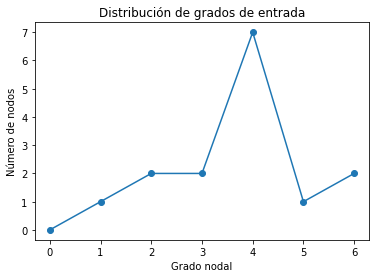

Su distrubución normalizada es:


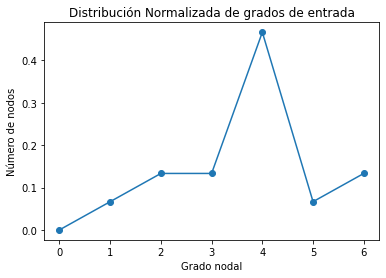


Gráfica 2
Su densidad es : 0.2857142857142857
Su distribucón de grados de entrada es :


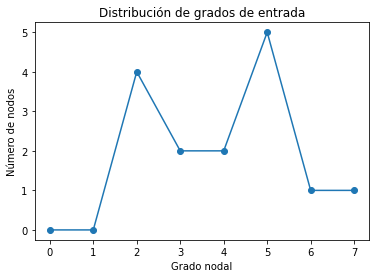

Su distrubución normalizada es:


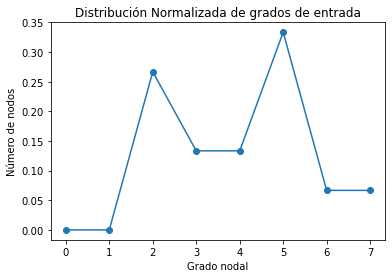


Gráfica 3
Su densidad es : 0.26666666666666666
Su distribucón de grados de entrada es :


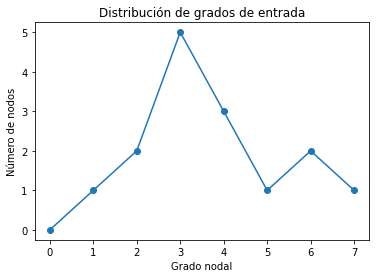

Su distrubución normalizada es:


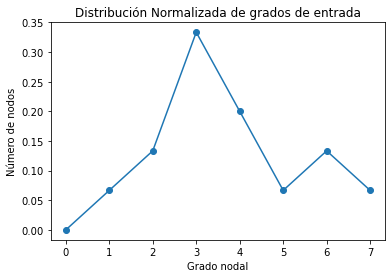


Gráfica 4
Su densidad es : 0.2761904761904762
Su distribucón de grados de entrada es :


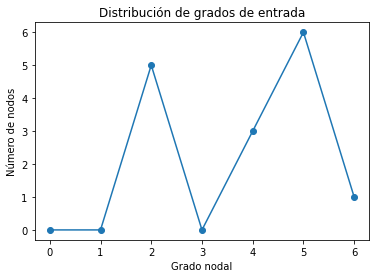

Su distrubución normalizada es:


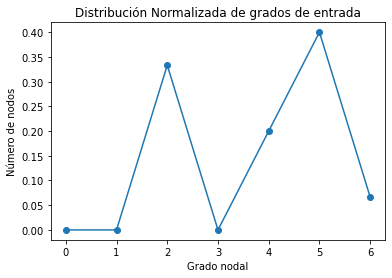


Gráfica 5
Su densidad es : 0.21904761904761905
Su distribucón de grados de entrada es :


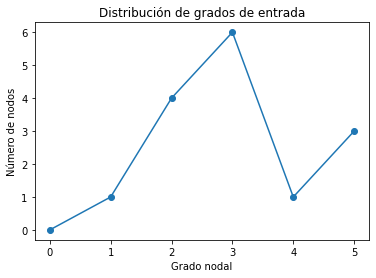

Su distrubución normalizada es:


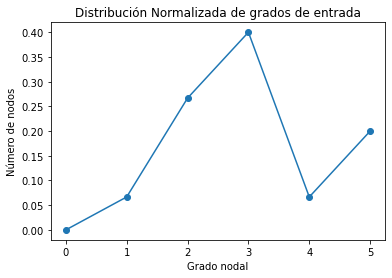

In [40]:
i = 0
for g in g_r:
    print("Gráfica", i+1)
    print("Su densidad es :", densidad(g))
    dist = dist_grados_de_entrada(g)
    print("Su distribucón de grados de entrada es :")
    dist = dist_grados_de_entrada(g)
    grafica_distr_entrada(dist)
    print("Su distrubución normalizada es:")
    dist_n = dist_normalizada_entrada(g)
    grafica_distr_norm_entrada(dist_n)
    print("")
    i += 1

### Gráficas de escala libre

Gráfica 1
Su densidad es : 0.2571428571428571
Su distribucón de grados de entrada es :


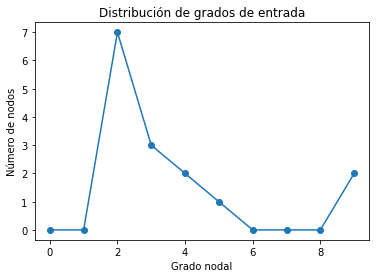

Su distrubución normalizada es:


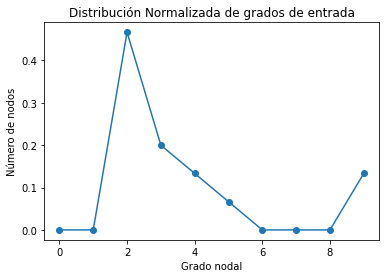


Gráfica 2
Su densidad es : 0.2571428571428571
Su distribucón de grados de entrada es :


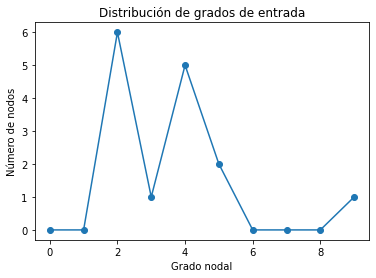

Su distrubución normalizada es:


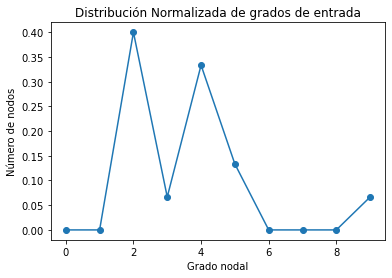


Gráfica 3
Su densidad es : 0.2571428571428571
Su distribucón de grados de entrada es :


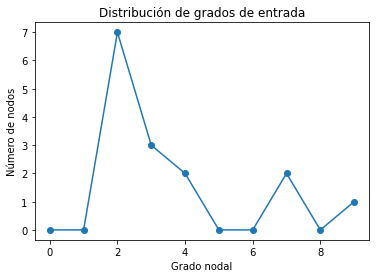

Su distrubución normalizada es:


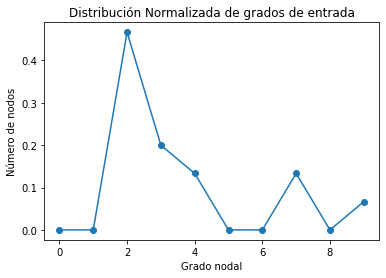


Gráfica 4
Su densidad es : 0.2571428571428571
Su distribucón de grados de entrada es :


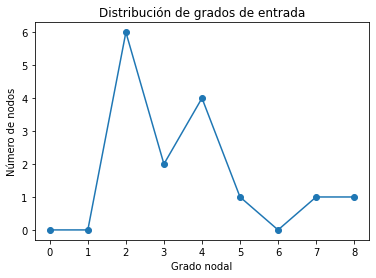

Su distrubución normalizada es:


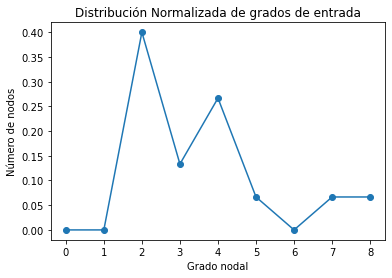


Gráfica 5
Su densidad es : 0.2571428571428571
Su distribucón de grados de entrada es :


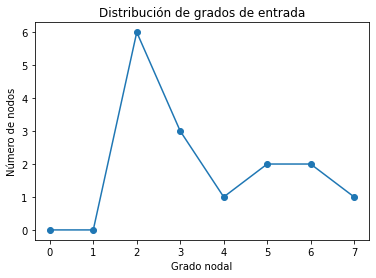

Su distrubución normalizada es:


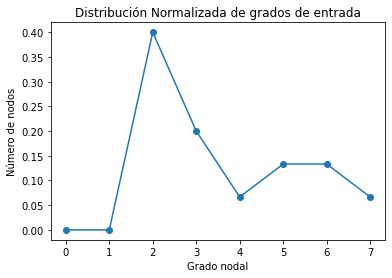

In [41]:
i = 0
for g in g_l:
    print("Gráfica", i+1)
    print("Su densidad es :", densidad(g))
    dist = dist_grados_de_entrada(g)
    print("Su distribucón de grados de entrada es :")
    dist = dist_grados_de_entrada(g)
    grafica_distr_entrada(dist)
    print("Su distrubución normalizada es:")
    dist_n = dist_normalizada_entrada(g)
    grafica_distr_norm_entrada(dist_n)
    print("")
    i += 1